In [1]:
import pandas as pd
import matplotlib.pyplot as plt
ts_data=pd.read_csv(r'C:\Users\ramee\Desktop\uni_files\python\jupyter\train_ML_IOT.csv')
                        

In [3]:
df1=pd.DataFrame(ts_data)

In [7]:
df1['DateTime']=pd.to_datetime(df1['DateTime'])

In [8]:
df1=df1.set_index(['DateTime'])

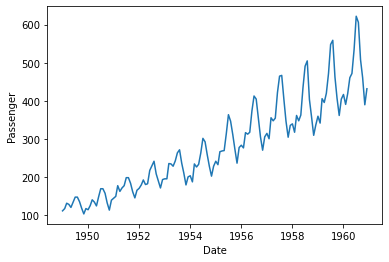

In [6]:
plt.xlabel('Date')
plt.ylabel('Passenger')
plt.plot(ts_data)


In [7]:
#stationarity check


In [8]:
rol_mean=ts_data.rolling(window=12).mean()
rol_std=ts_data.rolling(window=12).std()



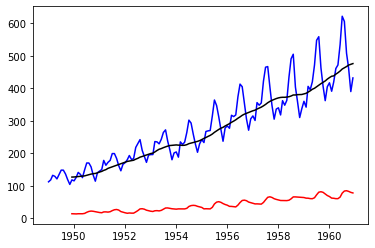

In [9]:
plt.plot(ts_data,c='blue')
plt.plot(rol_mean,c='black')
plt.plot(rol_std,c='red')

In [10]:
#ADF Test


In [11]:
from statsmodels.tsa.stattools import adfuller

adfest=adfuller(ts_data['#Passengers'])
print(adfest)

(0.8153688792060468, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts_data)
trend=decompose.trend
seasonal=decompose.seasonal

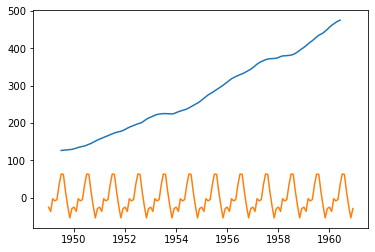

In [13]:
plt.plot(trend)
plt.plot(seasonal)

In [14]:
#convertimg non-stationary data to stationary data

In [15]:
tsdata_new=ts_data['#Passengers']- ts_data['#Passengers'].shift(2)

In [16]:
adfuller(tsdata_new.dropna())

(-2.9616951355554297,
 0.03862975767698786,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 985.7309222414162)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


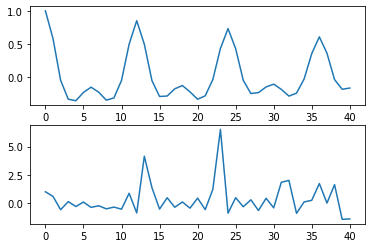

In [17]:
from statsmodels.tsa.stattools import acf,pacf
d_acf = acf(tsdata_new.dropna())
d_pacf=pacf(tsdata_new.dropna())
plt.subplot(211)
plt.plot(d_acf)
plt.subplot(212)
plt.plot(d_pacf)

In [25]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(ts_data,order=(2,2,1),seasonal_order=(2,2,1,12))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [26]:
res=model_fit.forecast(24)

In [27]:
res

1961-01-01    450.442504
1961-02-01    421.609965
1961-03-01    464.627291
1961-04-01    491.757450
1961-05-01    509.715105
1961-06-01    575.584195
1961-07-01    666.598205
1961-08-01    659.075014
1961-09-01    549.647973
1961-10-01    495.631488
1961-11-01    427.023045
1961-12-01    471.722673
1962-01-01    490.221133
1962-02-01    458.194976
1962-03-01    500.517142
1962-04-01    534.249445
1962-05-01    553.118394
1962-06-01    623.134917
1962-07-01    721.082237
1962-08-01    710.500557
1962-09-01    593.335372
1962-10-01    536.979862
1962-11-01    462.071192
1962-12-01    508.964986
Freq: MS, dtype: float64

In [28]:
res = pd.DataFrame(res)
res.columns=['#Passengers']
ts_data_pred = pd.DataFrame(ts_data)
ts_data_pred = ts_data_pred.append(res)

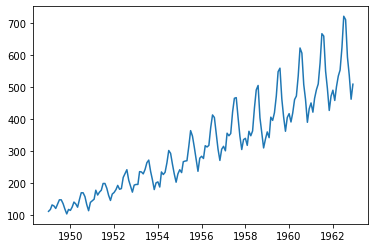

In [29]:
plt.plot(ts_data_pred)